# Домашнее задание 3

Это домашнее задание по материалам второго семинаров. Дедлайн по отправке - 23:55 24 февраля. 

Домашнее задание выполняется в этом же Jupyter Notebook'e и присылается мне на почту: __beznosikov.an@phystech.edu__.

Решение каждой задачи необходимо поместить после её условия.

Файл должен называться: Фамилия_Имя_Optimization_HW_3

При полном запуске Вашего решения (Kernel -> Restart & Run All) все ячейки должны выполняться без ошибок. 

## Задача 1

Вновь рассмотрим задачу минимизации эмпирического риска:
\begin{equation}
\min_{w \in \mathbb{R}^d} \frac{1}{n} \sum\limits_{i=1}^n l (g(w, x_i), y_i).
\end{equation}

В прошлом задании работа шла с линейной модель $g(w, x) = w^T x$ и квадратичную функцию потерь $l(z, y) = (z-y)^2$. 

__(а)__ В дополнение к квадратичной функции потерь реализуйте логистическую/сигмоидную: $l(z,y) = \ln (1 + \exp(-yz))$ (__Важно: $y$ должен принимать значения $-1$ или $1$__). Выпишите градиент. Является ли новая задача регресии выпуклой? Оцените $L$ для новой функции потерь. 

$\nabla \frac{1}{n}\sum\limits_{i=1}^n l(g(w,x_i),y_i)=\nabla \frac{1}{n}\sum\limits_{i=1}^n (1+\exp (-w^Tx_iy_i))=-\frac{1}{n}\sum\limits_{i=1}^n \frac{\exp(-w^Tx_iy_i)}{1+\exp(-w^Tx_iy_i)}x_iy_i$

$\nabla^2 \frac{1}{n}\sum\limits_{i=1}^n l(g(w,x_i),y_i)=\frac{1}{n}\sum\limits_{i=1}^n \frac{\exp(-w^Tx_iy_i)}{(1+\exp(-w^Tx_iy_i))^2}x_ix_i^T(y_i)^2$

Гессиан определен неотрицательно: $\frac{\exp(-w^Tx_iy_i)}{(1+\exp(-w^Tx_iy_i))^2}>0$, $x_ix_i^T$ положительно определено, $(y_i)^2>0$

Оценим Гессиан  сверху: $\nabla^2 \frac{1}{n}\sum\limits_{i=1}^n l(g(w,x_i),y_i)=\frac{1}{n}\sum\limits_{i=1}^n \frac{1}{(1+exp(-w^Tx_iy_i))(\frac{1}{exp(-w^Tx_iy_i)}+1)}x_ix_i^T$

Рассмотрим $(1+exp(-w^Tx_iy_i))(\frac{1}{exp(-w^Tx_iy_i)}+1$. $(1+z)(1+\frac{1}{z})=2+z+\frac{1}{z}\geq 4$

Тогда $\nabla^2 \frac{1}{n}\sum\limits_{i=1}^n l(g(w,x_i),y_i)=\frac{1}{4n}\sum\limits_{i=1}^{n}x_ix_i^T$

__(б)__ Возьмите датасет _mushrooms_ из прошлого задания. Проделайте следующие шаги из прошлого задания, только с логистической функцией потерь:

1) Разделите данные на две части: обучающую и тестовую.

2) Для обучающей части $X_{train}$, $y_{train}$ оцените константу $L$ задачи обучения/оптимизации.

3) Используя градиентный спуск, обучите новую модель (без ограничений и регуляризаций). Постройте график: точность от номера итерации.

4) Если в пункте 3) пришлось столкнуться с проблемами или просто необходимо улучшить точность, то добавьте ограничения или $\ell_2$-регуляризацию, как в прошлом ДЗ.

5) Сравните с результатами квадратичной функции потерь из прошлого ДЗ.

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt
import math
import numpy as np
import scipy

dataset = "mushrooms.txt" 
#файл должен лежать в той же деректории, что и notebook
from sklearn.datasets import load_svmlight_file
data = load_svmlight_file(dataset)
X, y = data[0].toarray(), data[1]
n, d = X.shape
#print(n,d)
#print(y.size)
for i in range(n): 
    if (y[i]==2): 
        y[i]=-1.0
n_train=int(n*0.75)
X_train=X[:n_train]
y_train=y[:n_train]
X_tst=X[n_train+1:]
y_tst=y[n_train+1:]
print(y_train.shape, X_train.shape)
eigvals = np.linalg.eigvals(X_train.T@X_train)
L = 1/4/n*max(eigvals)

print("L= ", L)
#print(y_train)

(6093,) (6093, 112)
L=  (2.037428468867495+0j)


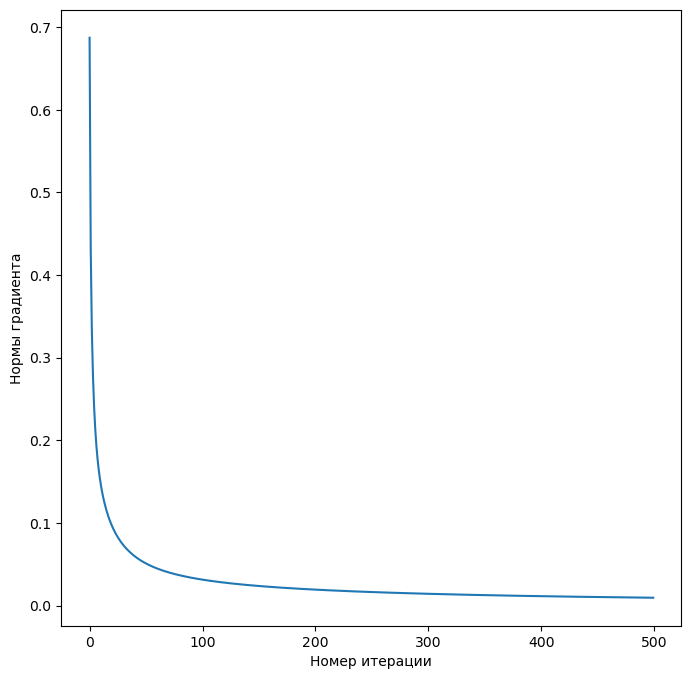

In [2]:
Y_gr1=[]

def f(w,X,y):
    res = np.array([0.0] * X.shape[1]) 
    for i in range(y.size): 
        res *= 1.0 + np.exp(-w.T @ X[i] * y[i]) 
    res = np.log(res) / (y.size) 
    return res 

def grad_f(w,X,y):
    res = np.array([0.0] * X.shape[1]) 
    for i in range(y.size): 
        e = np.exp(w.T @ X[i] * y[i]) 
        res = res + (1 / (1 + e) * X[i] * y[i])
    res = -res / (y.size) 
    return res

def gradient_descent(x0,X,y,N, gamma_k):
    x=x0
    k=0
    while(k<N):
        grad = grad_f(x,X,y)
        x=x- gamma_k* grad
        k=k+1
        Y_gr1.append(np.linalg.norm(grad))
    return x

N=500
w0=np.array([0.0]*d)
w=w0
guessed = []


for i in range(N):
    w=gradient_descent(w,X_train,y_train, 1, 1/L)
    y_guessed = X_tst @ w
    g=0
    for i in range(len(w)):
        if y_guessed[i] * y_tst[i]>0:
            g += 1
    guessed.append(g)
    

plt.figure(figsize=(8, 8))
X_gr=range(N)
plt.plot(X_gr, Y_gr1)
plt.xlabel('Номер итерации'), plt.ylabel('Нормы градиента')
plt.show()

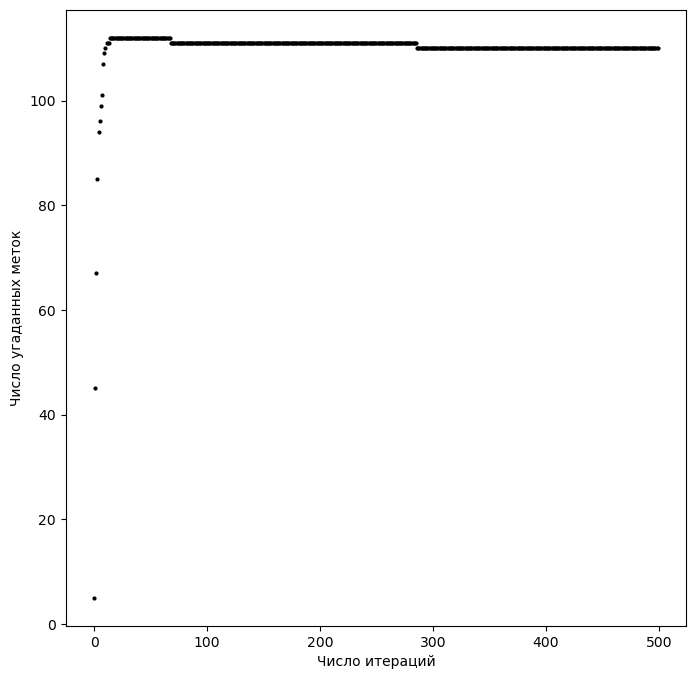

In [3]:

plt.figure(figsize=(8, 8))
X_gr=range(N)
plt.errorbar(X_gr, guessed, yerr = 0, xerr = 0, fmt = 'o',color = '0', ms = 2, label = '')
plt.xlabel("Число итераций")
plt.ylabel("Число угаданных меток")
plt.show()
Y_gr1=guessed

## Задача 2

__(a)__ Реализуйте метод тяжелого шарика. 

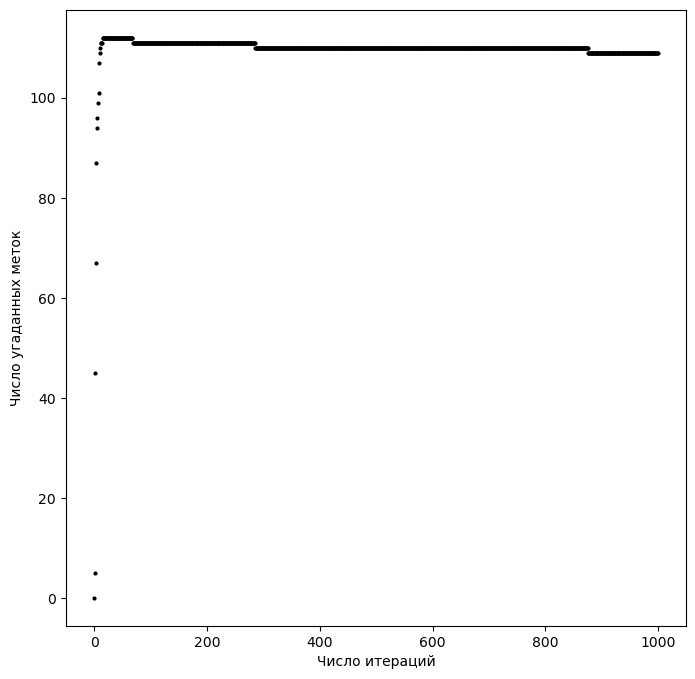

In [4]:
Y_gr2=[]

def heavy_ball(w0,X,y,N, gamma_k, inertion):
    w=[]
    w.append(w0)
    grad = grad_f(w[0],X,y)
    w.append(w[0]-gamma_k*grad)
    k=1
    while(k<N-1):
        grad = grad_f(w[k],X,y)
        Y_gr2.append(np.linalg.norm(grad))
        w.append(w[k]-gamma_k*grad+inertion*(w[k-1]-w[k-2]))
        k=k+1

    return w

N=1000
w0=np.array([0.0]*d)
w=w0
guessed = []

w_array=heavy_ball(w0,X_train,y_train, N, 1/L, 0.005)
for w in w_array:
    y_guessed = X_tst @ w
    g=0
    for i in range(len(w)):
        if y_guessed[i] * y_tst[i]>0:
            g += 1
    guessed.append(g)
    

plt.figure(figsize=(8, 8))
X_gr=range(N)
plt.xlabel("Число итераций")
plt.ylabel("Число угаданных меток")
plt.errorbar(X_gr, guessed, yerr = 0, xerr = 0, fmt = 'o',color = '0', ms = 2, label = '')
plt.show()


__(б)__ Решите задачу логистической регрессии с помощью метода тяжелого шарика (не забудьте разделить выборку на две части: обучающую и тестовую). Зафиксируйте шаг $\frac{1}{L}$ и перебирайте разные значения моментума от -1 до 1. Постройте график сходимости метода от числа итераций (критерий сходимости подберите самостоятельно) для различных значений моментума. Всегда ли сходимость является монотонной?

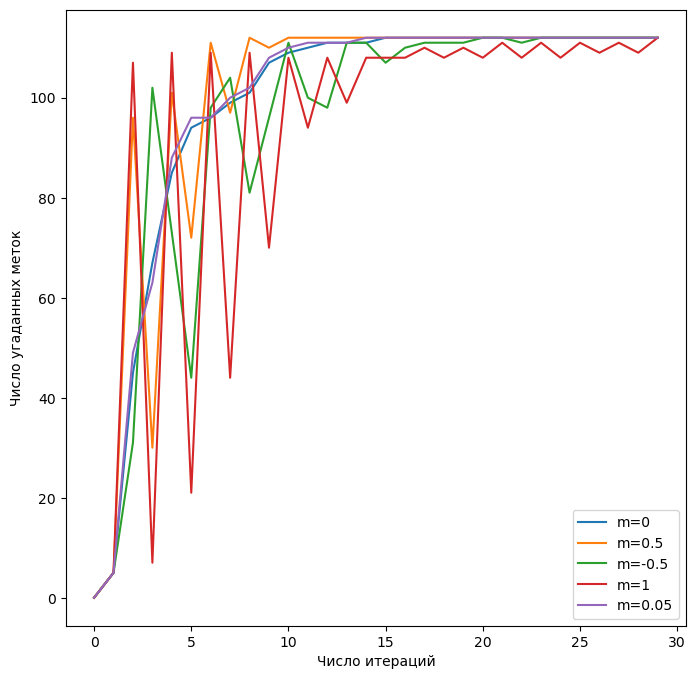

In [5]:
N=30
def guess(inertion):
    w0=np.array([0.0]*d)

    guessed = []
    w_array=heavy_ball(w0,X_train,y_train, N, 1/L, inertion)
    for w in w_array:
        y_guessed = X_tst @ w
        g=0
        for i in range(len(w)):
            if y_guessed[i] * y_tst[i]>0:
                g += 1
        guessed.append(g)
    return guessed
    
plt.figure(figsize=(8, 8))
X_gr=range(N)
plt.plot(X_gr, guess(0), label="m=0")
plt.plot(X_gr, guess(0.5), label="m=0.5")
plt.plot(X_gr, guess(-0.5), label="m=-0.5")
plt.plot(X_gr, guess(1), label="m=1")
#plt.plot(X_gr, guess(-1), label="m=-1") #очень плохой график
plt.plot(X_gr, guess(0.05), label="m=0.05")



plt.xlabel("Число итераций")
plt.ylabel("Число угаданных меток")

plt.legend(loc='lower right')

plt.show()

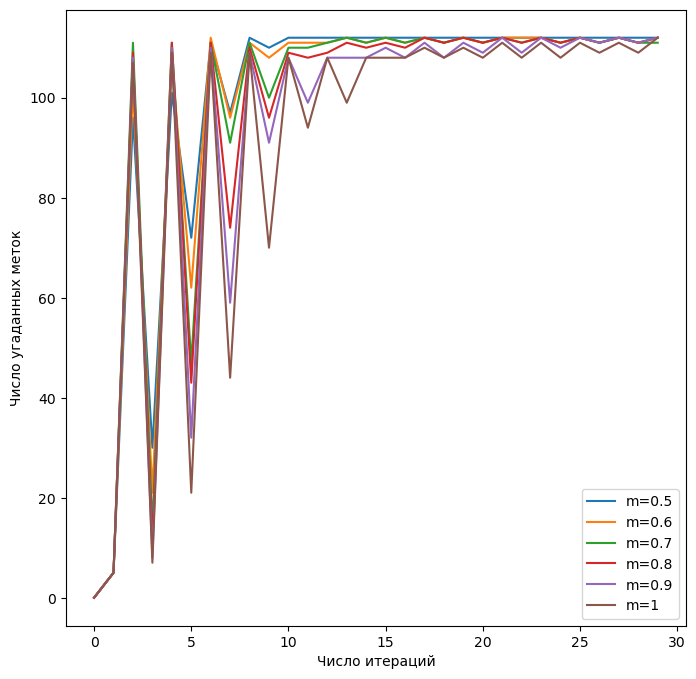

In [6]:
plt.figure(figsize=(8, 8))
X_gr=range(N)

plt.plot(X_gr, guess(0.5), label="m=0.5")


plt.plot(X_gr, guess(0.6), label="m=0.6")
plt.plot(X_gr, guess(0.7), label="m=0.7")
plt.plot(X_gr, guess(0.8), label="m=0.8")
plt.plot(X_gr, guess(0.9), label="m=0.9")
plt.plot(X_gr, guess(1), label="m=1")

plt.xlabel("Число итераций")
plt.ylabel("Число угаданных меток")

plt.legend(loc='lower right')

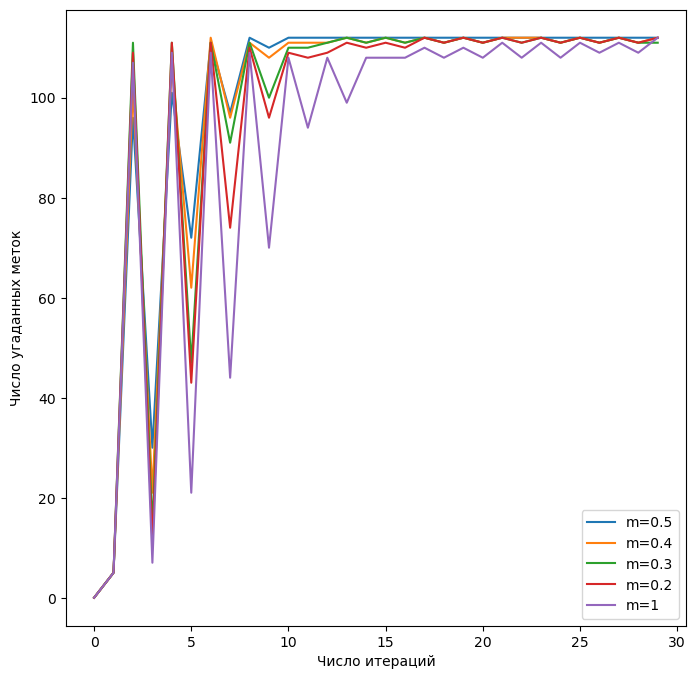

In [7]:
plt.figure(figsize=(8, 8))
X_gr=range(N)

plt.plot(X_gr, guess(0.5), label="m=0.5")


plt.plot(X_gr, guess(0.6), label="m=0.4")
plt.plot(X_gr, guess(0.7), label="m=0.3")
plt.plot(X_gr, guess(0.8), label="m=0.2")
plt.plot(X_gr, guess(1), label="m=1")

plt.xlabel("Число итераций")
plt.ylabel("Число угаданных меток")

plt.legend(loc='lower right')

Лучшее значение моментума $m=0.5$

__(в)__ Для лучшего значения моментума постройте график зависимости точности модели на тестовой выборке от времени работы метода. Добавьте на этот же график сходимость градиентного спуска с шагом $\frac{1}{L}$. Сделайте вывод.

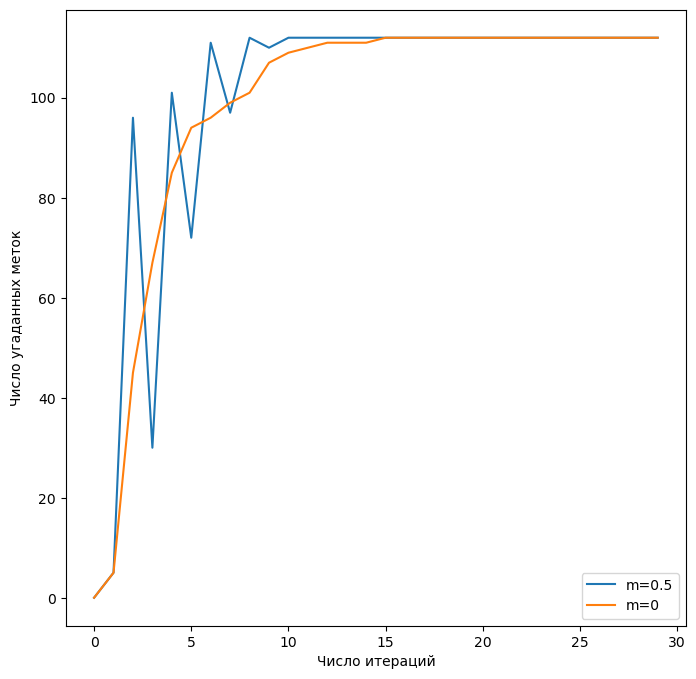

In [8]:
plt.figure(figsize=(8, 8))
X_gr=range(N)

plt.plot(X_gr, guess(0.5), label="m=0.5")

plt.plot(X_gr, guess(0), label="m=0")

plt.xlabel("Число итераций")
plt.ylabel("Число угаданных меток")

plt.legend(loc='lower right')


Y_gr2=guess(0.5)

__(г)__ Если в пунктах (б) и (в) столкнулись с проблемами, попробуйте $\ell_2$-регуляризовать задачу или рассмотреть ее на ограниченном множестве.

In [9]:
#ответ

__(д)__ Реализуйте ускоренный метод Нестерова (в форме Нестерова, а не который доказывали на семинаре). 

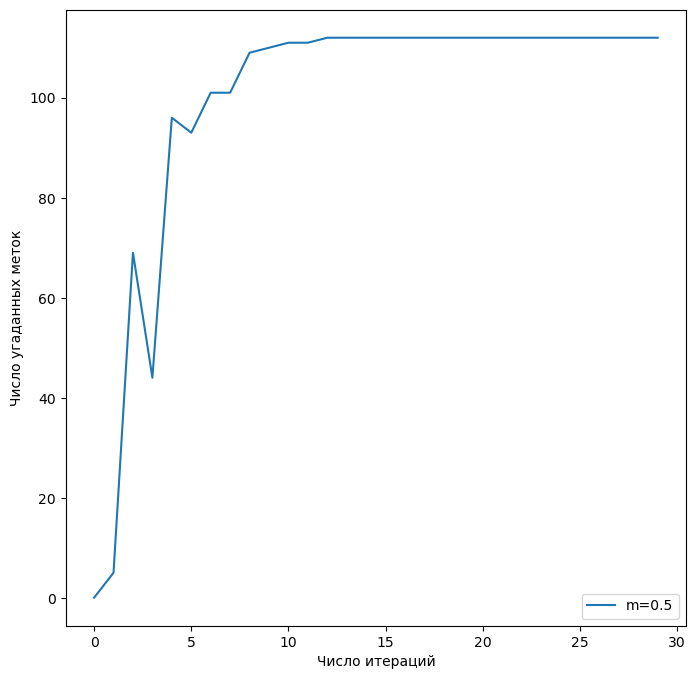

In [10]:


def Nesterov_acceleration(w0,X,y,N, gamma_k, inertion):
    w=[]
    w.append(w0)
    grad = grad_f(w[0],X,y)
    w.append(w[0]-gamma_k*grad)
    k=1
    while(k<N-1):
        grad = grad_f(w[k],X,y)
        w.append(w[k]-gamma_k*(grad+inertion*(w[k-1]-w[k-2]))+inertion*(w[k-1]-w[k-2]))
        k=k+1

    return w

N=30
def guess(inertion):
    w0=np.array([0.0]*d)

    guessed = []
    w_array=Nesterov_acceleration(w0,X_train,y_train, N, 1/L, inertion)
    for w in w_array:
        y_guessed = X_tst @ w
        g=0
        for i in range(len(w)):
            if y_guessed[i] * y_tst[i]>0:
                g += 1
        guessed.append(g)
    return guessed
plt.figure(figsize=(8, 8))
X_gr=range(N)

plt.plot(X_gr, guess(0.5), label="m=0.5")

plt.xlabel("Число итераций")
plt.ylabel("Число угаданных меток")

plt.legend(loc='lower right')
plt.show()

__(е)__ Решите задачу логистической регресии с помощью метода Нестерова (не забудьте разделить выборку на две части: обучающую и тестовую). Зафиксируйте шаг $\frac{1}{L}$ и перебирайте разные значения моментума от -1 до 1. Проверьте также значения моментума равные $\frac{k}{k+3}$, $\frac{k}{k+2}$, $\frac{k}{k+1}$ ($k$ - номер итерации), а если решаете сильно выпуклую задачу, то и $\frac{\sqrt{L} - \sqrt{\mu}}{\sqrt{L} + \sqrt{\mu}}$. Постройте график сходимости метода от числа итераций (критерий сходимости подберите самостоятельно) для различных значений моментума. Всегда ли сходимость является монотонной?

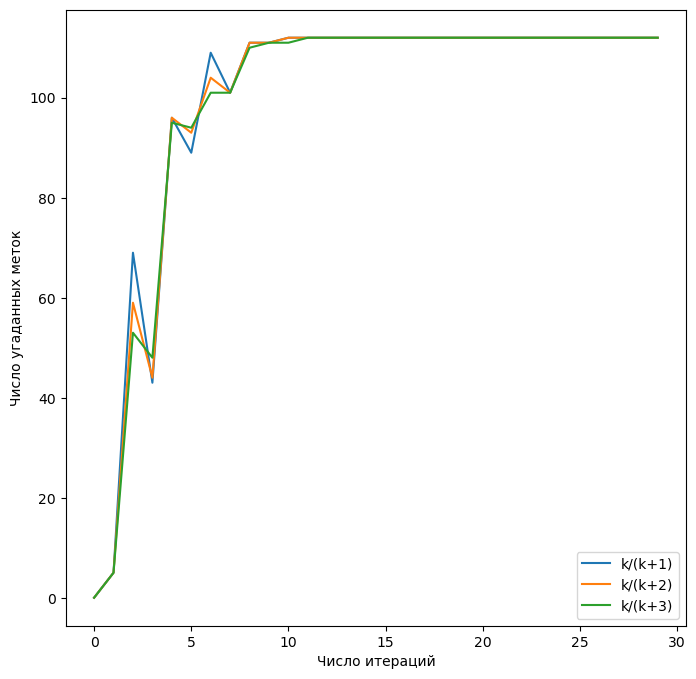

In [11]:
def Nesterov_acceleration(w0,X,y,N, gamma_k, l):
    w=[]
    w.append(w0)
    grad = grad_f(w[0],X,y)
    w.append(w[0]-gamma_k*grad)
    k=1
    while(k<N-1):
        inertion = k/(k+l)
        grad = grad_f(w[k],X,y)
        w.append(w[k]-gamma_k*(grad+inertion*(w[k-1]-w[k-2]))+inertion*(w[k-1]-w[k-2]))
        k=k+1

    return w


N=30
def guess(l):
    w0=np.array([0.0]*d)
    guessed = []
    w_array=Nesterov_acceleration(w0,X_train,y_train, N, 1/L, l)
    for w in w_array:
        y_guessed = X_tst @ w
        g=0
        for i in range(len(w)):
            if y_guessed[i] * y_tst[i]>0:
                g += 1
        guessed.append(g)
    return guessed
plt.figure(figsize=(8, 8))
X_gr=range(N)



plt.plot(X_gr, guess(1), label="k/(k+1)")
plt.plot(X_gr, guess(2), label="k/(k+2)")
plt.plot(X_gr, guess(3), label="k/(k+3)")

plt.xlabel("Число итераций")
plt.ylabel("Число угаданных меток")

plt.legend(loc='lower right')
plt.show()

Y_gr3 = guess(2)

На графике видно, что $k/(k+2)$ самая быстрая

__(ж)__ Для лучшего значения моментума постройте график зависимости точности модели на тестовой выборке от времени работы метода. Добавьте этот график к графикам для тяжелого шарика и градиентного спуска из пункта (г). Сделайте итоговый вывод.

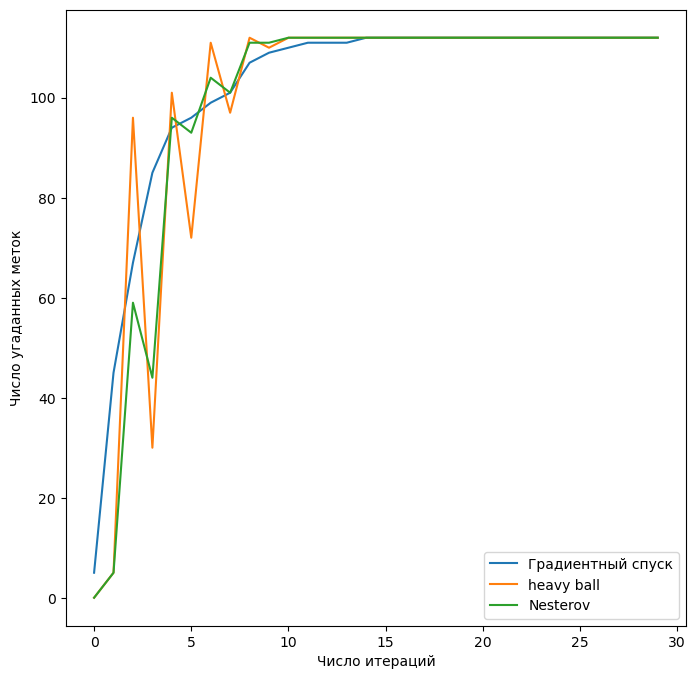

In [12]:
N=30
w0=np.array([0.0]*d)

plt.figure(figsize=(8, 8))
X_gr=range(N)
plt.plot(X_gr, Y_gr1[:N], label="Градиентный спуск")
plt.plot(X_gr, Y_gr2[:N], label="heavy ball")
plt.plot(X_gr, Y_gr3, label="Nesterov")

plt.xlabel("Число итераций")
plt.ylabel("Число угаданных меток")

plt.legend(loc='lower right')
plt.show()

В данном случае ускорение Нестерова быстрее

__Бонусные пункт__

__(з)__ Сделаем подбор константы $L$ адаптивным. Как упоминалось на семинаре, можно измерять локальную $L$, используя:
$$
f(y) \leq f(x^k) + \langle \nabla f(x^k), y - x^k \rangle + \frac{L}{2}\|x^k - y\|_2^2
$$
В частности, может подойти процедура:

```python
def backtracking_L(f, grad, x, h, L0, rho):
    L = L0
    fx = f(x)
    gradx = grad(x)
    while True:
        y = x - 1 / L * h
        if f(y) <= fx - 1 / L gradx.dot(h) + 1 / (2 * L) h.dot(h):
            break
        else:
            L = L * rho
    return L
```

Каким стоит взять __h__? __rho__ должно быть больше или меньше 1? __L0__ надо брать заведомо большим или маленьким?

In [13]:
#ответ

__(и)__ Поэксперементируйте с этой процедурой, встроенной в подбор $L$ для шага градиентного спуска. В качестве задачи продолжайте рассматривать логистическую регрессию из Задачи 1. Аналогично встройте процедуру подбора $L$ в метод тяжелого шарика и ускоренный метод Нестерова. Постройте график сходимости метода от числа итераций (критерий сходимости подберите самостоятельно). Отобразите на этом графике градиентный спуск, тяжелый шарик и метод Нестерова с адаптивным шагом и шагом $\frac{1}{L}$ (всего 6 линий на графике). Сделайте вывод.

In [14]:
#ответ

__(к)__ Постройте аналогичный пункту (и) график точности модели от времени.

In [15]:
#ответ

__(л)__ В [работе](https://arxiv.org/pdf/1204.3982.pdf) представлена техника рестартов для подавления немонотонной сходимости Алгоритма 2 (метод Нестерова). Попробуйте повторить эксперименты авторов на $\ell_2$-регуляризованной квадратичной или логистической регресии. Возьмите параметр регуляризации $\lambda = L / 100$.

In [16]:
#ответ